In [1]:
import os
os.getcwd()
os.chdir('/Users/rzh/Desktop/Despot')

In [2]:
from utils.geo import *

/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Users/rzh/anaconda3/envs/Despot/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Users/rzh/anaconda3/envs/Despot/lib/pyth

In [3]:
smdFile = "h5smds/MERFISH_10_0-0.h5smd"
info = smdInfo(smdFile)
info

=========3DLandscape Plotting==========
smdFile: h5smds/MERFISH_10_0-0.h5smd
Platform: MERFISH
No Image Path provided.
Cell Types: ['interneurons', 'pyramidal SS', 'pyramidal CA1', 'oligodendrocytes', 'microglia', 'endothelial-mural', 'astrocytes_ependymal']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces...
Saving 3DLandscape to /Users/rzh/Desktop/Despot/landscape.png
=========3DLandscape Finished==========


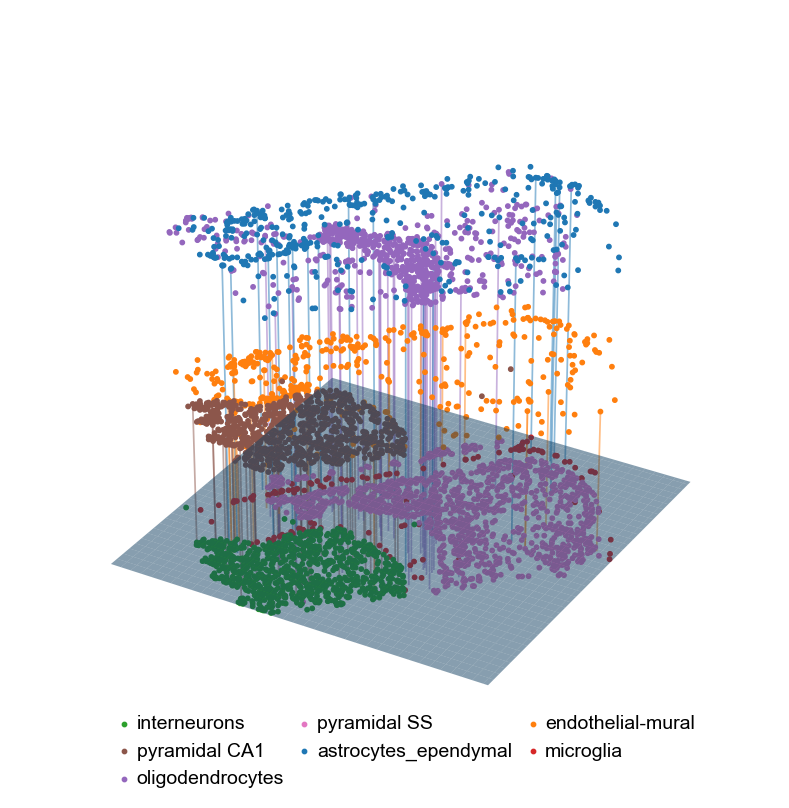

In [17]:
folder = "fig6_MERFISH"
res = Show_3D_landscape(smdFile, alpha=50, save=True, plot_edge=False)

=========3DLandscape Plotting==========
smdFile: h5smds/MERFISH_10_1-0.h5smd
Platform: MERFISH
No Image Path provided.
Cell Types: ['interneurons', 'pyramidal CA1', 'oligodendrocytes', 'endothelial-mural', 'astrocytes_ependymal']
Mapping cell-type-specific domains...
Arranging cell-type-specific domains...
Plotting domain edges and scatters...
Plotting surfaces...
=========3DLandscape Finished==========


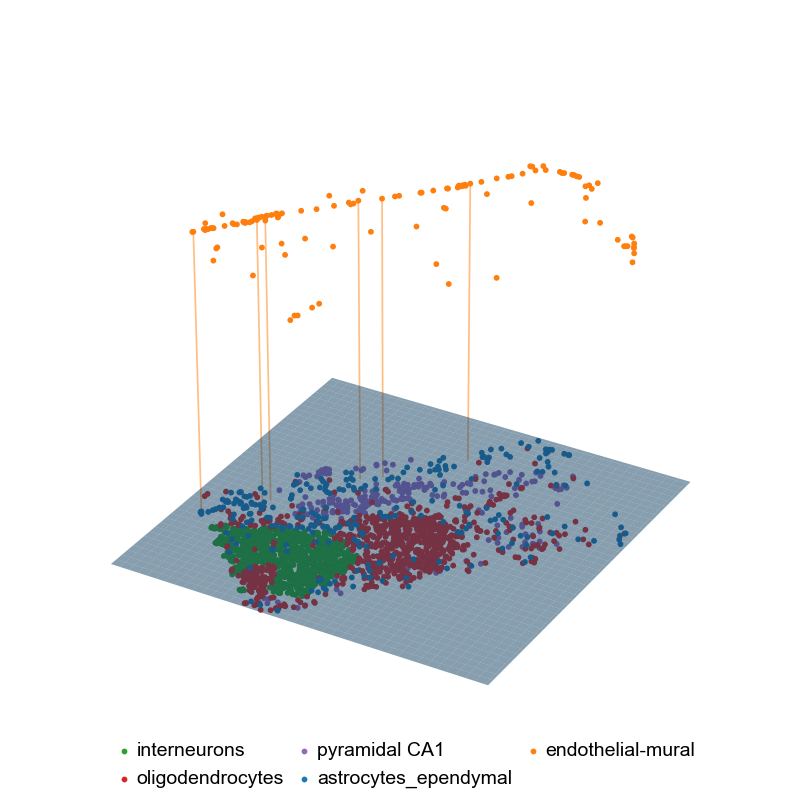

In [18]:
smdFile = "h5smds/MERFISH_10_1-0.h5smd"
res = Show_3D_landscape(smdFile, alpha=50, save=False, plot_edge=False)